In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import glob #if you want to read files from global invironment

In [4]:
# Trial to read individual file
AT1G01010 = pd.read_csv("../output_data/CNN_input_matrix_df/AT1G01010.csv")

In [5]:
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [6]:
# Check head of df
AT1G01010.head()

1  2  3  4  5  6  7  8  9  10  ...   1491  1492  1493  1494  1495  1496  \
0  0  0  0  0  0  0  0  0  0   0  ...    0.0     0   0.0     0     0     0   
1  0  0  0  0  0  0  0  0  0   0  ...    0.0     0   0.0     0     0     0   
2  0  0  0  0  0  0  0  0  0   0  ...    0.0     0   0.0     0     0     0   
3  0  0  0  0  0  0  0  0  0   0  ...    0.0     0   0.0     0     0     0   
4  0  0  0  0  0  0  0  0  0   0  ...    0.0     0   0.0     0     0     0   

   1497  1498  1499  1500  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 1500 columns]

In [65]:
# Check data type
AT1G01010.dtypes[0:10]

1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
dtype: object

#### Change all to float?

In [17]:
# Use if you need to remove/extract columns
AT1G01010.pop(help)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-l

ValueError: cannot label index with a null key

In [3]:
import glob
path = "../output_data/CNN_input_matrix_df_782/"
file_list = glob.glob(path + '/*.csv')
print(file_list[0:5])

['../output_data/CNN_input_matrix_df_782/AT1G10150.csv', '../output_data/CNN_input_matrix_df_782/AT1G15000.csv', '../output_data/CNN_input_matrix_df_782/AT1G11500.csv', '../output_data/CNN_input_matrix_df_782/AT1G03110.csv', '../output_data/CNN_input_matrix_df_782/AT1G01920.csv']


In [4]:
dfs=np.array([pd.read_csv(fp).values for fp in file_list])

In [5]:
dfs.shape

(782, 872, 1500)

In [6]:
labels = pd.read_csv("../output_data/CNN_expression_output_mean_apex_inflorescence_21d_782.csv")

In [7]:
labels.shape

(782, 1)

In [8]:
len(labels)

782

In [9]:
labels.dtypes

mean_apex inflorescence_21d    int64
dtype: object

In [10]:
train_set_y_orig = np.array(labels[:])
#train_set_y_orig

In [11]:
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))


In [12]:
train_set_y_orig.shape

(1, 782)

In [13]:
train_set_x_orig = dfs

In [14]:
train_set_x_orig.shape

(782, 872, 1500)

In [98]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [16]:
# Reshape

Y_train = train_set_y_orig.T
X_train = train_set_x_orig
#Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
#print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
#print ("X_test shape: " + str(X_test.shape))
#print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 782
X_train shape: (782, 872, 1500)
Y_train shape: (782, 1)


In [17]:
classes = np.array([0,1])
print(classes)
classes

[0 1]


array([0, 1])

In [122]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Conv1D(filters=128*16, kernel_size=7, strides=1, activation='relu', input_shape=(872, 1500), use_bias=True))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(32*2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')


In [123]:
model.fit(X_train, Y_train, epochs=10, batch_size=256, verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
782/782 [==============================] - 395s 505ms/step - loss: 9496.0120
Epoch 2/10
782/782 [==============================] - 392s 501ms/step - loss: 246.6006
Epoch 3/10
782/782 [==============================] - 379s 485ms/step - loss: 205.6748
Epoch 4/10
782/782 [==============================] - 363s 465ms/step - loss: 133.0887
Epoch 5/10
782/782 [==============================] - 374s 478ms/step - loss: 75.8126
Epoch 6/10
782/782 [==============================] - 369s 472ms/step - loss: 45.6671
Epoch 7/10
782/782 [==============================] - 367s 469ms/step - loss: 23.6328
Epoch 8/10
782/782 [==============================] - 370s 474ms/step - loss: 23.2833
Epoch 9/10
782/782 [==============================] - 366s 468ms/step - loss: 18.6957
Epoch 10/10
782/782 [==============================] - 369s 472ms/step - loss: 8.8226


In [128]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Conv1D(filters=128*16, kernel_size=7, strides=1, activation='relu', input_shape=(872, 1500), use_bias=True))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(32*2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])

In [132]:
history = model.fit(X_train, Y_train, epochs=10, verbose=1, validation_split=0.2)


Train on 625 samples, validate on 157 samples
Epoch 1/10
625/625 [==============================] - 336s 537ms/step - loss: 42.1293 - acc: 0.0912 - val_loss: 1.8793 - val_acc: 0.3248
Epoch 2/10
625/625 [==============================] - 328s 525ms/step - loss: 12.7136 - acc: 0.1312 - val_loss: 1.3256 - val_acc: 0.3503
Epoch 3/10
625/625 [==============================] - 331s 529ms/step - loss: 10.9959 - acc: 0.1664 - val_loss: 1.0403 - val_acc: 0.3121
Epoch 4/10
625/625 [==============================] - 341s 546ms/step - loss: 2.6902 - acc: 0.2768 - val_loss: 0.4599 - val_acc: 0.5096
Epoch 5/10
625/625 [==============================] - 332s 531ms/step - loss: 1.1687 - acc: 0.4608 - val_loss: 0.5086 - val_acc: 0.4522
Epoch 6/10
625/625 [==============================] - 338s 541ms/step - loss: 0.3223 - acc: 0.6640 - val_loss: 0.3264 - val_acc: 0.5223
Epoch 7/10
625/625 [==============================] - 337s 539ms/step - loss: 0.1561 - acc: 0.7952 - val_loss: 0.4707 - val_acc: 0.5414

In [130]:
history.history


{'val_loss': [7.794924474825525],
 'val_acc': [0.19108280378162482],
 'loss': [655.883850692749],
 'acc': [0.0304]}

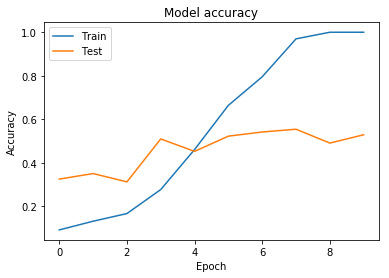

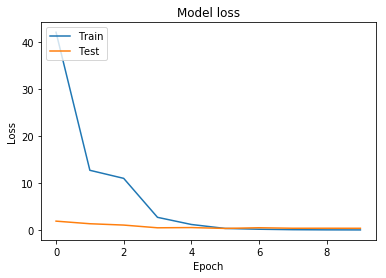

In [133]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
pred_test=model.predict(data_test)

from scipy.stats.stats import pearsonr
print(pearsonr(labels_test, pred_test.reshape(len(pred_test))))


In [ ]:
# Example for regularization:

from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))

In [140]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Conv1D(filters=128, kernel_size=782, strides=1, activation='relu', input_shape=(872, 1500), use_bias=True))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(1000, activation='relu',
               kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(200, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed

model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])

In [142]:
history = model.fit(X_train, Y_train, epochs=10, verbose=1, validation_split=0.2)

Train on 625 samples, validate on 157 samples
Epoch 1/10
625/625 [==============================] - 612s 980ms/step - loss: 13.2688 - acc: 0.5344 - val_loss: 12.7581 - val_acc: 0.5096
Epoch 2/10
625/625 [==============================] - 664s 1s/step - loss: 12.3353 - acc: 0.5344 - val_loss: 11.8626 - val_acc: 0.5096
Epoch 3/10
625/625 [==============================] - 684s 1s/step - loss: 11.4775 - acc: 0.5344 - val_loss: 11.0489 - val_acc: 0.5096
Epoch 4/10
625/625 [==============================] - 664s 1s/step - loss: 10.6981 - acc: 0.5344 - val_loss: 10.3078 - val_acc: 0.5096
Epoch 5/10
625/625 [==============================] - 572s 915ms/step - loss: 9.9868 - acc: 0.5344 - val_loss: 9.6295 - val_acc: 0.5096
Epoch 6/10
625/625 [==============================] - 584s 934ms/step - loss: 9.3339 - acc: 0.5344 - val_loss: 9.0037 - val_acc: 0.5096
Epoch 7/10
625/625 [==============================] - 596s 953ms/step - loss: 8.7292 - acc: 0.5344 - val_loss: 8.4235 - val_acc: 0.5096
Epo

In [18]:
X_train.shape
X_train[:20].shape

(20, 872, 1500)

In [19]:

X_train_reshaped = X_train.reshape(782, 872, 1500, 1)
X_train_reshaped.shape

(782, 872, 1500, 1)

In [9]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Conv2D(filters=128, kernel_size=(782, 1), strides=1, activation='relu', input_shape=(872, 1500, 1), use_bias=True))
#model.add(MaxPooling2D(pool_size=(4, 4))
model.add(Flatten())
model.add(Dense(100, activation='relu',
               kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(20, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed
          

          
          
        
          
          
          

model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])

In [10]:
history = model.fit(X_train_reshaped, Y_train, epochs=2, verbose=1, validation_split=0.2)

NameError: name 'X_train_reshaped' is not defined

# Keras_Tutorial_v2a

In [120]:
def model(input_shape):
    """
    input_shape: The height, width and channels as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    """

    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

In [119]:
print(X_train.shape)
X_train.shape[1:4]



(782, 872, 1500)


(872, 1500)

In [121]:
my_model = model(X_train.shape[1:4])

ValueError: Shape must be rank 4 but is rank 3 for 'zero_padding2d_3/Pad' (op: 'Pad') with input shapes: [?,872,1500], [4,2].

In [115]:
model.compile(optimizer='adam', loss='mse')


AttributeError: 'function' object has no attribute 'compile'

In [116]:
model(X_train, Y_train, labels, epochs=10, batch_size=256, verbose=1)

TypeError: model() got an unexpected keyword argument 'epochs'